In [17]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt


In [18]:
df = pd.read_csv('/content/income.csv')
df.head(5)

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


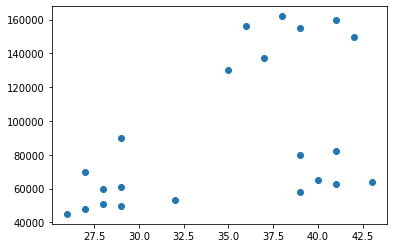

In [19]:
plt.scatter(df['Age'],df['Income($)'])

In [ ]:
# scalling each feature to given range
# fit: compute min, max of X_array
# transform: scale feature in X_array according to range
scal = MinMaxScaler()
scal.fit(df[['Income($)']]) 
df[['Income($)']]= scal.transform(df[['Income($)']])

scal = MinMaxScaler()
scal.fit(df[['Age']]) 
df[['Age']]= scal.transform(df[['Age']])


In [47]:
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [48]:
y_pred = km.fit_predict(df[['Age','Income($)']])
y_pred

array([2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0],
      dtype=int32)

In [ ]:
df['Clusters'] = y_pred
df

In [60]:
# return matrix row, coloums: point is centroids of k_cluster
km.cluster_centers_

array([[0.85294118, 0.2022792 ],
       [0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428]])

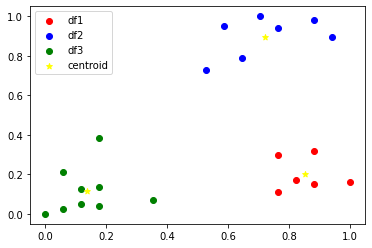

In [66]:
# Seperate df into df1, df2, df3
df1 = df[df.Clusters==0]
df2= df[df.Clusters==1]
df3 = df[df.Clusters==2]

plt.scatter(df1['Age'],df1['Income($)'], color = 'red',label='df1')
plt.scatter(df2['Age'],df2['Income($)'], color = 'blue',label='df2')
plt.scatter(df3['Age'],df3['Income($)'], color = 'green',label='df3')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],marker = '*', color = 'yellow',label='centroid')
plt.legend()

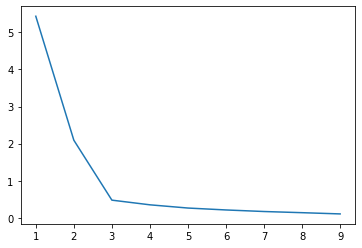

In [76]:
# find k in kmeans
# Inertia measures how well a dataset was clustered by K-Means. 
# It is calculated by measuring the distance between each data point and its centroid, 
# squaring this distance, and summing these squares across one cluster.
k_ind = range(1,10)
sse = []
for k in k_ind:
  km = KMeans(n_clusters=k)
  km.fit(df[['Age','Income($)']])
  sse.append(km.inertia_)

plt.plot(k_ind, sse)